## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## Explore the Data

In [5]:
test_data = pd.read_csv('test.zip', compression='zip')
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [6]:
train_data = pd.read_csv('train.zip', compression='zip')
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [8]:
train_data.shape

(7049, 31)

In [9]:
test_data.shape

(1783, 2)

# Clean the data

In [10]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [11]:
test_data.isnull().sum()

ImageId    0
Image      0
dtype: int64

In [12]:
# Fill the nan values with forward filling method
train_data.ffill(inplace=True)

# Visualize and preprocess

In [13]:
img_height, img_width = 96, 96

In [14]:
images = []
for idx, sample in train_data.iterrows():
    image = np.array(sample['Image'].split(' '), dtype=int).reshape(img_height, img_width, 1)
    image = image / 255.0
    images.append(image)

In [15]:
images = np.array(images)

In [16]:
images.shape

(7049, 96, 96, 1)

In [17]:
images[0][0][0][0] # First images first pixel

0.9333333333333333

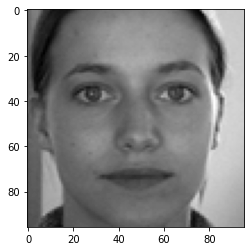

In [18]:
plt.imshow(images[69], cmap='gray')
plt.show()

In [19]:
keypoint_features = []
keypoint = train_data.drop('Image', axis=1)
for idx, sample in keypoint.iterrows():
    keypoint_features.append(sample)

In [20]:
keypoint_features = np.array(keypoint_features, dtype=float)

In [21]:
images.shape

(7049, 96, 96, 1)

In [22]:
keypoint_features

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ..., 75.96359236,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ..., 75.96359236,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ..., 75.96359236,
        45.90048   , 82.7730963 ]])

In [23]:
x_train = images
y_train = keypoint_features

In [24]:
def image_with_keypoints(index):
    image = plt.imshow(x_train[index], cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(y_train[index][i-1], y_train[index][i], 'r*'))
        
    return image, l

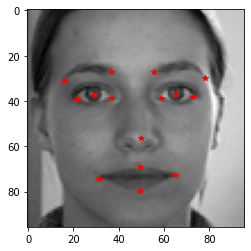

In [25]:
_ = image_with_keypoints(69)

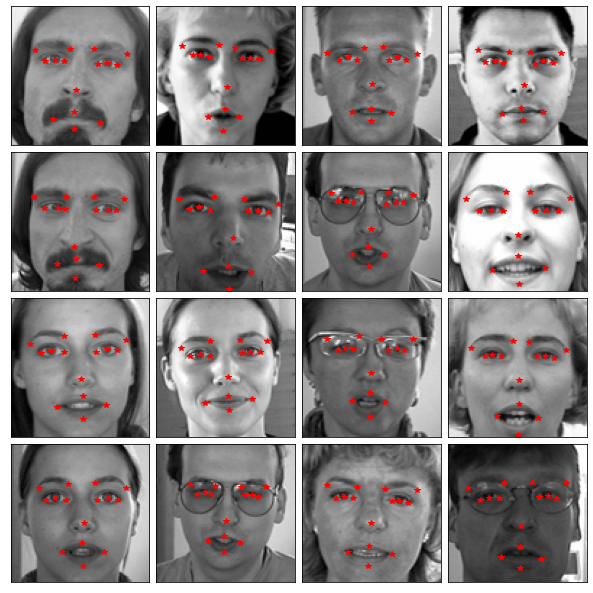

In [26]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    image_with_keypoints(i)

# Model

In [27]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

In [28]:
input_shape = (img_height, img_width, 1)
kernel_size = (3, 3)

In [29]:
model = keras.Sequential()
model.add(Conv2D(64, kernel_size=kernel_size, 
                 input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, kernel_size=kernel_size, 
                 input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size=kernel_size, 
                 input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D((2,2)))
          
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(30))

model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

2023-01-24 17:15:08.343933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 17:15:08.434521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 17:15:08.435277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 17:15:08.436882: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [31]:
%%time
history = model.fit(x_train, y_train, batch_size=32,
                    epochs=50, validation_split=0.2)

2023-01-24 17:15:11.377459: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-24 17:15:12.743357: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


177/177 [==============================] - 10s 14ms/step - loss: 152.4252 - accuracy: 0.5143 - val_loss: 8.2453 - val_accuracy: 0.6872
Epoch 2/50
177/177 [==============================] - 2s 11ms/step - loss: 11.5837 - accuracy: 0.5937 - val_loss: 8.3755 - val_accuracy: 0.6872
Epoch 3/50
177/177 [==============================] - 2s 11ms/step - loss: 11.0028 - accuracy: 0.5865 - val_loss: 5.4459 - val_accuracy: 0.6872
Epoch 4/50
177/177 [==============================] - 2s 12ms/step - loss: 11.7907 - accuracy: 0.5895 - val_loss: 6.4487 - val_accuracy: 0.6695
Epoch 5/50
177/177 [==============================] - 2s 11ms/step - loss: 10.9711 - accuracy: 0.5944 - val_loss: 6.4719 - val_accuracy: 0.6773
Epoch 6/50
177/177 [==============================] - 2s 11ms/step - loss: 10.5717 - accuracy: 0.6015 - val_loss: 18.3040 - val_accuracy: 0.6277
Epoch 7/50
177/177 [==============================] - 2s 11ms/step - loss: 10.9445 - accuracy: 0.6026 - val_loss: 6.7838 - val_accuracy: 0.6652


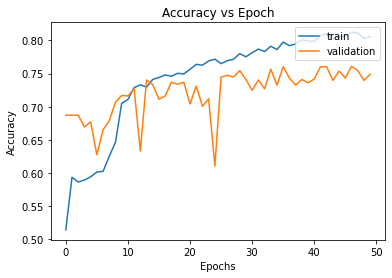

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [33]:
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [34]:
y_test = []
for idx, sample in test_data.iterrows():
    image = np.array(sample['Image'].split(' '), dtype=int).reshape(img_height, img_width, 1)
    image = image / 255.0
    y_test.append(image)
y_test = np.array(y_test)

In [35]:
preds = model.predict(y_test)
print(preds)

[[64.8542   35.43837  28.537933 ... 66.918846 46.321697 84.290146]
 [67.47755  35.034805 26.068108 ... 71.44834  49.662285 85.08896 ]
 [66.862175 35.673897 31.307453 ... 68.32261  50.137432 83.18452 ]
 ...
 [68.592186 41.22306  33.889194 ... 74.95046  46.25079  76.33044 ]
 [61.91954  36.471172 29.65506  ... 73.686    44.432312 71.67055 ]
 [67.37015  39.359913 31.23152  ... 75.66621  46.241116 79.33051 ]]


In [36]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

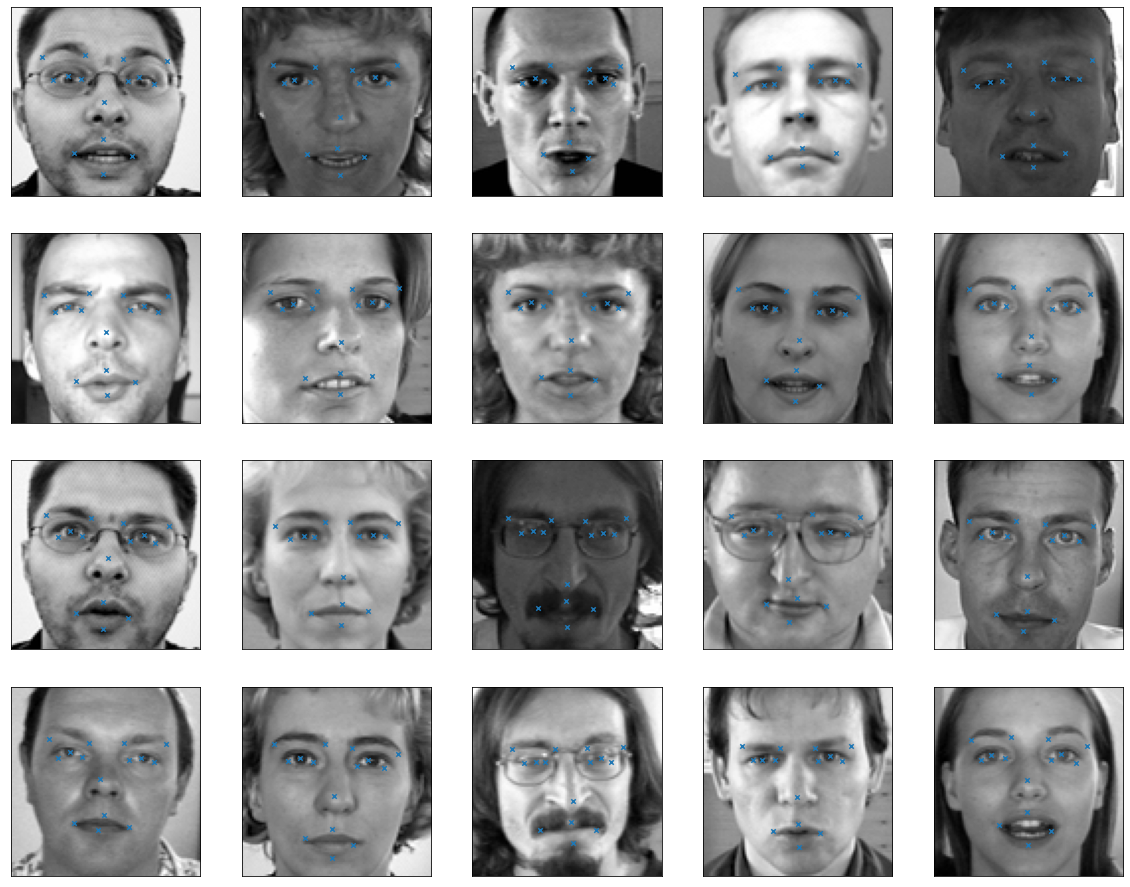

In [37]:
fig = plt.figure(figsize=(20,16))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(y_test[i], preds[i], axis, "")
plt.show()

In [38]:
lookup_file = '../input/facial-keypoints-detection/IdLookupTable.csv'
lookup = pd.read_csv(lookup_file)

In [39]:
lookup.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [40]:
print(preds[0][29])

84.290146


In [41]:
feature = list(lookup['FeatureName'])
image_ids = list(lookup['ImageId']-1)
row_ids = lookup['RowId']
pre_list = list(preds)

feature_list = []
for f in feature:
    feature_list.append(feature.index(f))
 
final_preds = []
for x,y in zip(image_ids, feature_list):
    final_preds.append(pre_list[x][y])
    
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(final_preds, name = 'Location')
locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids, locations], axis = 1).set_index('RowId')
submission_result.to_csv('submission.csv')